In [3]:
import cfGPR
import treecorr
import vonkarman as vk

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
import scipy.optimize as opt

In [3]:
# Set turbulence parameters
max_sep = (10 * u.arcmin).to(u.deg).value
bins = 50

variance = 100 # mas^2
outerScale = 5 # deg
diameter = 0.2 # deg
wind_x = 0.2 # deg
wind_y = 0.04 # deg

In [5]:
# Generate fake data
ttt_fake = vk.TurbulentLayer(
    variance=variance,
    outerScale=outerScale,
    diameter=diameter,
    wind=(wind_x, wind_y))

# Generate Cuv on a grid
dx = max_sep / (bins/2) 
xx = np.arange(-bins/2, bins/2) * dx
x = np.ones((bins, bins),dtype=float) * xx
y = np.array(x.transpose())
X = np.vstack([x.ravel(), y.ravel()])

cuv = ttt_fake.getCuv(x, y)
xiplus = cuv[:,:,0,0] + cuv[:,:,1,1]
data_to_be_fitted = xiplus.ravel()

In [8]:
def fit_variance_only(X, var):
    # Function to fit covariance function to
    print(var)
    
    ttt = vk.TurbulentLayer(
        variance=var,
        outerScale=outerScale,
        diameter=diameter,
        wind=(wind_x, wind_y))
    
    cuv = ttt.getCuv(X[0].reshape((bins, bins)), X[1].reshape((bins, bins)))
    xiplus = cuv[:,:,0,0] + cuv[:,:,1,1]
    
    return xiplus.ravel()

In [16]:
p0 = np.array([150]) # start the optimizer at a slightly different value than truth

fit = opt.curve_fit(
    fit_variance_only,
    X,
    data_to_be_fitted,
    p0=p0)

150
150.0
150.0
150.00000223517418
99.99999999526875
100.00000148538487
100.0


In [11]:
# Result of the above test is that this optimizer perfectly gets the variance very easily on its own.
# Now try fitting for variance and wind

In [13]:
def fit_variance_wind(X, var, w_x, w_y):
    # Function to fit covariance function to
    print(var, w_x, w_y)
    
    ttt = vk.TurbulentLayer(
        variance=var,
        outerScale=outerScale,
        diameter=diameter,
        wind=(w_x, w_y))
    
    cuv = ttt.getCuv(X[0].reshape((bins, bins)), X[1].reshape((bins, bins)))
    xiplus = cuv[:,:,0,0] + cuv[:,:,1,1]
    
    return xiplus.ravel()

In [19]:
p0 = np.array([150, 1, 0]) # start the optimizer at a slightly different parameter values than truth.

bounds = np.array([
    (0, 1e8),
    (0, 100),
    (0, 100),
]).T

fit = opt.curve_fit(
    fit_variance_wind,
    X,
    data_to_be_fitted,
    p0=p0,
    bounds=bounds)

150.0 1.0 1e-10
150.00000223517418 1.0 1e-10
150.0 1.0000000149011612 1e-10
150.0 1.0 1.5001161193847657e-08
146.5217568260461 1.6968281627832882 0.04547417756084352
146.52175900939042 1.6968281627832882 0.04547417756084352
146.5217568260461 1.696828188067998 0.04547417756084352
146.5217568260461 1.6968281627832882 0.045474192462004716
145.65103003363447 1.6796554828003776 0.05275028249779851
145.65103220400394 1.6796554828003776 0.05275028249779851
145.65103003363447 1.6796555078291946 0.05275028249779851
145.65103003363447 1.6796554828003776 0.05275029739895971
143.91572423567442 1.6448721023346298 0.05274836767955785
143.91572638018582 1.6448721023346298 0.05274836767955785
143.91572423567442 1.644872126845134 0.05274836767955785
143.91572423567442 1.6448721023346298 0.052748382580719046
140.47024035376336 1.5735602804929065 0.05274369963331329
140.47024244693304 1.5735602804929065 0.05274369963331329
140.47024035376336 1.573560303940782 0.05274369963331329
140.47024035376336 1.5735

In [20]:
# This test as also successful. Lets try all the parameters now

In [44]:
def fit_all(X, var, os, d, w_x, w_y):
    # Function to fit covariance function to
    print(var, os, d, w_x, w_y)
    
    ttt = vk.TurbulentLayer(
        variance=var,
        outerScale=os,
        diameter=d,
        wind=(w_x, w_y))
    
    cuv = ttt.getCuv(X[0].reshape((bins, bins)), X[1].reshape((bins, bins)))
    xiplus = cuv[:,:,0,0] + cuv[:,:,1,1]
    
    return xiplus.ravel()

In [27]:
p0 = np.array([150, 4, 0.1, 1, 1]) # start the optimizer at a slightly different parameter values than truth.

bounds = np.array([
    (20, 500),
    (4, 6),
    (0.01, 0.2),
    (0.01, 10),
    (0.01, 10),
]).T

fit = opt.curve_fit(
    fit_all,
    X,
    data_to_be_fitted,
    p0=p0,
    bounds=bounds)

150.0 4.0000000004 0.1 1.0 1.0
150.00000223517418 4.0000000004 0.1 1.0 1.0
150.0 4.000000060004645 0.1 1.0 1.0
150.0 4.0000000004 0.1000000149011612 1.0 1.0
150.0 4.0000000004 0.1 1.0000000149011612 1.0
150.0 4.0000000004 0.1 1.0 1.0000000149011612
113.26536888528429 4.0000000003575344 0.0844431358911143 0.675886486336246 0.6123681094909987
113.2653705730698 4.0000000003575344 0.0844431358911143 0.675886486336246 0.6123681094909987
113.26536888528429 4.000000059962179 0.0844431358911143 0.675886486336246 0.6123681094909987
113.26536888528429 4.0000000003575344 0.08444315079227549 0.675886486336246 0.6123681094909987
113.26536888528429 4.0000000003575344 0.0844431358911143 0.6758865012374072 0.6123681094909987
113.26536888528429 4.0000000003575344 0.0844431358911143 0.675886486336246 0.6123681243921599
98.94736486616922 4.0000000007055965 0.10233444576981816 0.5323540285410115 0.4095464363024178
98.94736634059986 4.0000000007055965 0.10233444576981816 0.5323540285410115 0.40954643630241

KeyboardInterrupt: 

variance = 100 # mas^2
outerScale = 5 # deg
diameter = 0.2 # deg
wind_x = 0.2 # deg
wind_y = 0.04 # deg

at 2km height, diameter is 0.1 deg
d/h * 180/pi

5km with a factor of 3 either side
4m at 5km is 0.05 deg

range: 0.01 to 0.2

check tolerances

In [34]:
GP = cfGPR.CurlFreeGPR()
GP.load_fits('folio2')
GP.extract_data(465)
GP.sigma_clip()
GP.split_data(train_size=0.50)

xiplus, counts = cfGPR.vcorr2d(GP.X[:, 0], GP.X[:, 1], GP.Y[:, 0], GP.Y[:, 1], rmax=max_sep, bins=bins)
real_xiplus = xiplus.ravel()

In [45]:
p0 = np.array([409., 4., 0.0634, 0.0304, 0.0688]) # start the optimizer at a slightly different parameter values than truth.

bounds = np.array([
    (20, 500),
    (1, 10),
    (0.01, 0.2),
    (0.01, 10),
    (0.01, 10),
]).T

fit = opt.curve_fit(
    fit_all,
    X,
    real_xiplus,
    p0=p0,
    bounds=bounds
)

409.0 4.0 0.0634 0.0304 0.0688


/home/fortino/DESworkspace/vonkarman.py:183: RuntimeWarning: divide by zero encountered in log
  return  self.interpolator(np.log(r))


409.0000060945749 4.0 0.0634 0.0304 0.0688
409.0 4.000000059604645 0.0634 0.0304 0.0688
409.0 4.0 0.06340001490116119 0.0304 0.0688
409.0 4.0 0.0634 0.030400014901161194 0.0688
409.0 4.0 0.0634 0.0304 0.0688000149011612
407.93732541504136 3.8798324425208954 0.06486106709353094 0.03083840300992468 0.06982354728915063
407.9373314937812 3.8798324425208954 0.06486106709353094 0.03083840300992468 0.06982354728915063
407.93732541504136 3.879832500334904 0.06486106709353094 0.03083840300992468 0.06982354728915063
407.93732541504136 3.8798324425208954 0.06486108199469214 0.03083840300992468 0.06982354728915063
407.93732541504136 3.8798324425208954 0.06486106709353094 0.030838417911085873 0.06982354728915063
407.93732541504136 3.8798324425208954 0.06486106709353094 0.03083840300992468 0.06982356219031183
407.8861674056811 3.881395426001308 0.06515163441394481 0.030339763755864533 0.06956158490558356
407.8861734836586 3.881395426001308 0.06515163441394481 0.030339763755864533 0.06956158490558356

In [70]:
fit[0][0]

407.7147542553665

In [71]:
ttt_fake = vk.TurbulentLayer(
    variance=fit[0][0],
    outerScale=fit[0][1],
    diameter=fit[0][2],
    wind=(fit[0][3], fit[0][4]))

# Generate Cuv on a grid
dx = max_sep / (bins/2) 
xx = np.arange(-bins/2, bins/2) * dx
x = np.ones((bins, bins),dtype=float) * xx
y = np.array(x.transpose())
X = np.vstack([x.ravel(), y.ravel()])

cuv = ttt_fake.getCuv(x, y)
xiplus_modeled = cuv[:,:,0,0] + cuv[:,:,1,1]

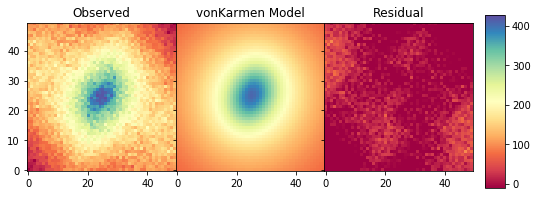

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(8, 24))
fig.subplots_adjust(wspace=0)

im = axes[0].imshow(xiplus, origin='lower', cmap='Spectral', interpolation='nearest', vmin=xiplus.min(), vmax=xiplus.max())
axes[0].set_title("Observed")

im = axes[1].imshow(xiplus_modeled, origin='lower', cmap='Spectral', interpolation='nearest', vmin=xiplus.min(), vmax=xiplus.max())
axes[1].set_title("vonKarmen Model")

im = axes[2].imshow(xiplus - xiplus_modeled, origin='lower', cmap='Spectral', interpolation='nearest', vmin=xiplus.min(), vmax=xiplus.max())
axes[2].set_title("Residual")

cb_ax = fig.add_axes([0.92, 0.45, 0.035, 0.1])
fig.colorbar(im, cax=cb_ax)

plt.show()

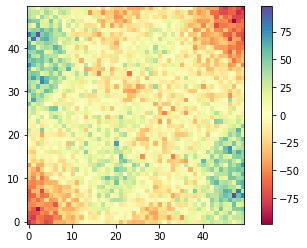

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1)
im = plt.imshow(xiplus - xiplus_modeled, origin='lower', cmap='Spectral', interpolation='nearest')
fig.colorbar(im, ax=ax)

(array([  5.,  50., 134., 367., 691., 654., 403., 159.,  31.,   6.]),
 array([-98.41560234, -78.79708825, -59.17857415, -39.56006005,
        -19.94154595,  -0.32303185,  19.29548225,  38.91399634,
         58.53251044,  78.15102454,  97.76953864]),
 <a list of 10 Patch objects>)

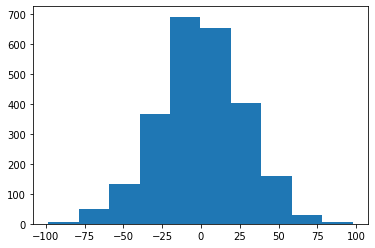

In [82]:
plt.hist((xiplus - xiplus_modeled).ravel())

Now let's try and insert this vonkarman stuff into cfGPR.py

In [78]:
GP = cfGPR.CurlFreeGPR()
GP.load_fits('folio2')
GP.extract_data(465)
GP.sigma_clip()
GP.split_data(train_size=0.5)

In [79]:
# Find the von Karman covariance function (with parameters found above) evaluated on GP.Xtrain
variance = 407.7147542553665
outerScale = 3.878338585239968
diameter = 0.06531508238641316
wind_x = 0.030319973279881323
wind_y = 0.06949688215459866

ttt = vk.TurbulentLayer(
    variance=variance,
    outerScale=outerScale,
    diameter=diameter,
    wind=(wind_x, wind_y))

X1, X2 = np.meshgrid(GP.Xtrain, GP.Xtrain[:, 1])
print(X1.shape, X2.shape)
cuv = ttt.getCuv(X1, X2)
K = np.moveaxis(cuv, 2, 1)
s = K.shape
K = K.reshape(s[0]*2, s[2]*2)

(4069, 4069) (4069, 4069)


/home/fortino/DESworkspace/vonkarman.py:183: RuntimeWarning: divide by zero encountered in log
  return  self.interpolator(np.log(r))


In [80]:
W = GP.white_noise_kernel(GP.Etrain)

X1, X2 = np.meshgrid(GP.Xtrain[:, 0], GP.Xtest[:, 1])
print(X1.shape, X2.shape)
cuv = ttt.getCuv(X1, X2)
Ks = np.moveaxis(cuv, 2, 1)
s = Ks.shape
Ks = Ks.reshape(s[0]*2, s[2]*2)

(4069, 4069) (4069, 4069)


In [81]:
Ks.shape, K.shape, GP.flat(GP.Ytrain).shape

((8138, 8138), (8138, 8138), (8138,))

In [88]:
fbar_s = np.dot(np.dot(Ks, np.linalg.inv(K + W)), GP.flat(GP.Ytrain))

In [89]:
GP.fbar_s = GP.unflat(fbar_s)

RMSx, RMSy, noise: 16.985283610987608 14.876919158736388 1.962890700869043


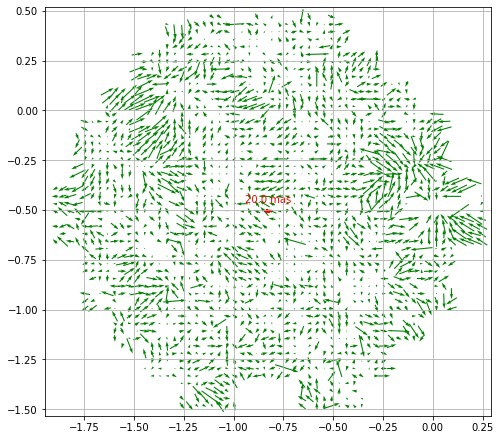

RMSx, RMSy, noise: 553.5191477288439 324.969293567311 1.962890700869043


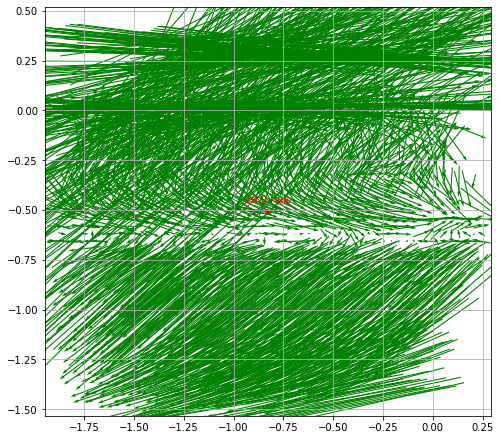

RMSx, RMSy, noise: 16.196545622048422 13.430636805512625 0.84993978619171


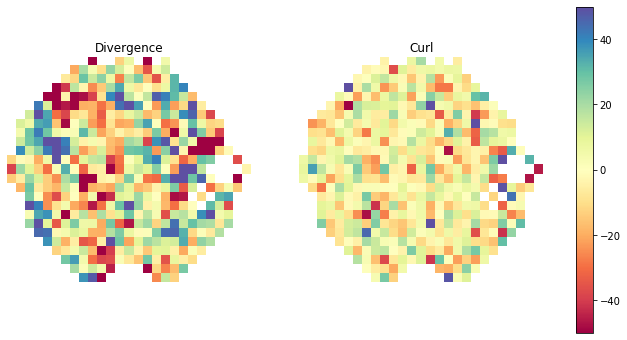

RMS of div: 30.24; curl: 16.58
RMSx, RMSy, noise: 541.4538171886653 310.4595301795806 0.84993978619171


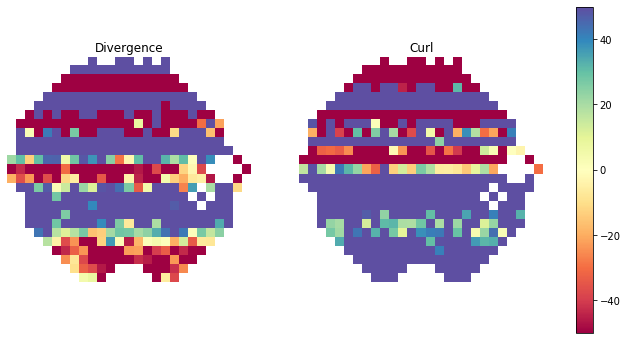

RMS of div: 165.43; curl: 126.85
Mean of first 30 points (Emode (Observed)):  435.7637604720614
Mean of first 30 points (Bmode (Observed)):  -8.728176573820285
Mean of first 30 points (Emode (GPR Applied)):  69888.63688097778
Mean of first 30 points (Bmode (GPR Applied)):  261264.23122052598
Ratio of E modes: 0.006235116034873863
Ratio of B modes: -3.340746849672304e-05


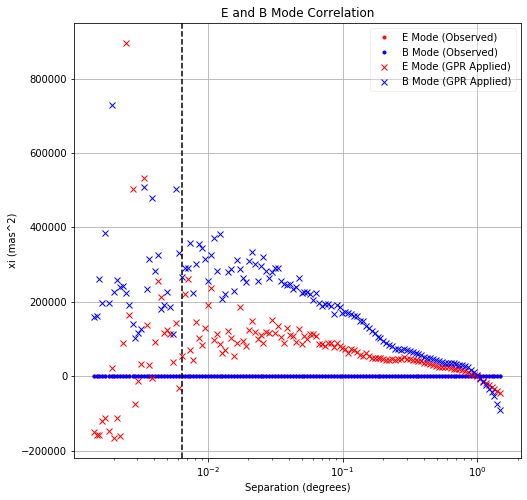

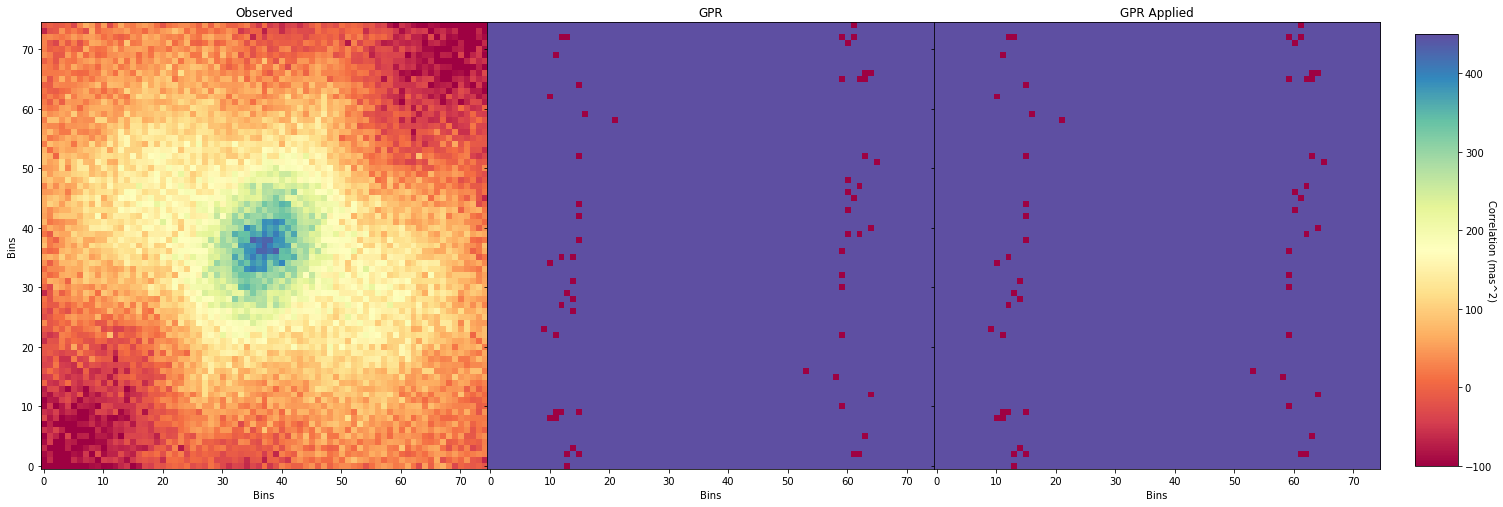

In [90]:
GP.plot_residuals(GP.Xtest, GP.Ytest, GP.Etest)
GP.plot_residuals(GP.Xtest, GP.Ytest - GP.fbar_s, GP.Etest)

GP.plot_div_curl(GP.Xtest, GP.Ytest, GP.Etest)
GP.plot_div_curl(GP.Xtest, GP.Ytest - GP.fbar_s, GP.Etest)

GP.plot_Emode_2ptcorr(GP.Xtest, GP.Ytest, Y2=GP.Ytest - GP.fbar_s)
GP.plot_xiplus_2d(GP.Xtest, GP.Ytest, Y2=GP.fbar_s)